<a href="https://colab.research.google.com/github/unpackAI/Ai101/blob/main/Week_3_Recommeder_Systems/03_Recommender_SolutionsWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Week 3 Solution Workbook of unpackAI "DL101 Bootcamp"


## 📕 Learning Objectives

* Understand the fundamental process of building your own collaborative filtering project.

## unpackAI Assignment Section

 
*   **Assignment 1**: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.
*   **Assignment 2**: Build an entire model using the suggested data sets. you will need to understand the data and then decide how you want to approach the problme. Then test your model and see which items are closely related.



In [ ]:
!pip install -Uqq fastbook
!pip install -Uqq unpackai
!pip install -Uqq tornado~=5.1.0 folium==0.2.1

In [ ]:
from fastbook import *
from fastai.collab import *
from fastai.tabular.all import *

## Assigment 1: Go through the questions below and indicate the answers you have selected

### Questionnaire 

Make sure you are able to answer the questions as they are written to make sure that you have an understanding of the work that you have learned. 

|#|Question|Answer
|:--|:---|:---
|1.|Name three types of recommender systems|A: Content based, Tabular based, Mixed approach
|||B: Collaborative, Hybrid, Content based image.png
|||C: Tabular, CNN method, Collaborative
|2.|What are the different approaches to Content Based filtering?|A: Product-centered approach
|||B: User information collaboration
|||C: Item-Centered or user centered approach image.png
|3.|Give an example of a use case for collaborative filtering|A: Netflix recomending movies based on your ratings image.png
|||B: Amazon predicting your future orders
|||C: Predicting the next crime hotspot
|4.|What problem does collaborative filtering solve?|A: The problem of understanding the collaboration of different datasets
|||B: The problem of having a large number of users and product and how to recommend different items to a user based on their previous choices and how they rated them.image.png
|||C The problem the Netflix had of how to recommend movies to users based on the movies that a user watched and what rating they gave it.image.png
|5.|What does NaN stand for?|A: Now and Never
|||B: Numbers and Null
|||C: Not a Number image.png
|6.|How does Collaborative Filtering solve the problem of relationships between product and user?|A: Collaborative filtering uses latent factors to determine how items relate to each other and what customer's preferences are. image.png
|||B: Collaborative filtering uses all the data you can feed the model and comes up with the best possible solution but we are not sure how it does this as the meaning of the latent factors is very abstract.
|||C: Collaborative filtering uses a table of big data that is too big and complex for a person to look at and it can see patterns in the data that allow it to recommend items
|7.|What would cause a Collaborative Filtering recommendation system to fail?|A: The model might fail because there is not sufficient data to be able to make the latent factors make sense.
|||B: The model might fail if too many people put in inaccurate ratings in stead of giving an honest answer. The outcome is based on how accurately you rate a movie.image.png
|||C: The model might fail if it over fits the data.


## Assigment 2: 

## Assignment 2: Build an entire collaborative filtering model starting from defining your objective, construcing your dataset to training your model and interpreting the results.

### Description of the Assignment

We have identified a number of data sets that you can use to build your own collabroative filtering project. Choose the data set that you would like to work on and by refactoring the code you have learned in the coursebook train your own colaborative filtering model and see what results you are able to get.  

Below you will find a brief description of the data set you can choose to download the data set to your local computer and open it in Excel or you can use Python and look at the data so that you can define your project clearly before you make you final choice and start coding.


1. **Anime Recommendations Database**

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compliation of those ratings. You can build anime recommendation system based only on user viewing history.

*Download the dataset here:*
https://www.dropbox.com/s/5hf29yrvwxejg6i/anime_recommendations.zip?dl=1

2. **Jester Collaborative Filtering Dataset** 

The funniness of joke is very subjective. Having more than 70,000 users rate jokes, can an algorithm be written to identify the universally funny joke? 
Since funniness is a very subjective matter, it will be very interesting to see if latent factors can bring out the details on what makes something funny.

*Download the dataset here:*
https://www.dropbox.com/s/ef1mytjms1indlf/jester_collaborative_filtering.zip?dl=1



3. **Book Recommendation Dataset**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

*Download the dataset here:*
https://www.dropbox.com/s/358awacarwmeumv/book_recommendation.zip?dl=1

### Assignment 2 execution

Once you have selected the data set you want to work on and you have defined your project you can start coding:

### **Anime Recommendations Database** 

#### 1. Define a Recommender System problem and propose a solution:

***Describe your items:*** 

***Describe your users:***

***What's the rating range?:***


#### 2. Collect and construct your dataset:

In [ ]:
path = untar_data('https://www.dropbox.com/s/5hf29yrvwxejg6i/anime_recommendations.zip?dl=1')

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/anime_recommendations/rating.csv'),Path('/root/.fastai/data/anime_recommendations/anime.csv')]

#### 3. Carry out data transformation

In [ ]:
ratings = pd.read_csv(path/'rating.csv')
ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [ ]:
animes = pd.read_csv(path/'anime.csv')
animes

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Hentai,OVA,1,4.98,175


Now we simply need to correctly merge the tables, so that we can add the name of the anime to the ratings table.

In [ ]:
ratings = ratings.merge(animes[["anime_id", "name"]])
ratings.head()

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,3,20,8,Naruto
2,5,20,6,Naruto
3,6,20,-1,Naruto
4,10,20,-1,Naruto


In [ ]:
#check the shape of the dataframe
ratings.shape

(7813727, 4)

In [ ]:
df = ratings.iloc[90000:90015]
df.head()

,user_id,anime_id,rating,name
90000,30228,356,9,Fate/stay night
90001,30235,356,8,Fate/stay night
90002,30236,356,9,Fate/stay night
90003,30258,356,7,Fate/stay night
90004,30267,356,8,Fate/stay night


In [ ]:
#NOTE there is too much data to create the pivot table in this data set, it will run out of memory and crash so you would need to slice the data
#NOTE there are so many people who have rate the movies that you don't really get any meaningful data from this pivot table, one or two movies at most
pivot = pd.pivot_table(df, index='anime_id', columns='user_id', values='rating')
pivot

user_id,30228,30235,30236,30258,30267,30269,30274,30276,30277,30280,30284,30289,30295,30300,30303
anime_id,,,,,,,,,,,,,,,
356,9,8,9,7,8,9,7,7,7,10,-1,10,-1,8,5


#### 4. Model Training

In [ ]:
dls = CollabDataLoaders.from_df(ratings, user_name='user_id', item_name='name')

In [ ]:
dls.show_batch()

,user_id,name,rating
0,61441,Aa! Megami-sama!: Sorezore no Tsubasa,7
1,50017,xxxHOLiC Kei,10
2,64664,Nurarihyon no Mago: Sennen Makyou,9
3,14423,One Punch Man: Road to Hero,-1
4,6162,Kuroshitsuji,10
5,62483,Air Gear,9
6,4339,Onegai☆Teacher,6
7,26383,Lovely★Complex,9
8,43953,Nisekoi,5
9,1563,IS: Infinite Stratos 2,-1


In [ ]:
range_rating = (min(ratings["rating"]), max(ratings["rating"]))
range_rating

(-1, 10)

In [ ]:
learn = collab_learner(dls, n_factors=40, y_range=(-1.5, 10.5), metrics=rmse)

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,_rmse,time
0,5.631492,5.369875,2.317300,19:11
1,5.279516,5.061967,2.249883,19:09
2,4.495621,4.883869,2.209946,19:07
3,4.994741,4.849998,2.202271,19:12


#### 5. Interpret the model and make predictions

In [ ]:
g = ratings.groupby('name')['rating'].count()
top_animes = g.sort_values(ascending=False).index.values[:1000]
top_animes

array(['Death Note', 'Sword Art Online', 'Shingeki no Kyojin', 'Code Geass: Hangyaku no Lelouch', 'Elfen Lied', 'Angel Beats!', 'Naruto', 'Fullmetal Alchemist', 'Fullmetal Alchemist: Brotherhood',
       'Toradora!', 'Code Geass: Hangyaku no Lelouch R2', 'Highschool of the Dead', 'Sen to Chihiro no Kamikakushi', 'Mirai Nikki (TV)', 'Clannad', 'Ao no Exorcist', 'Another', 'Soul Eater',
       'Tengen Toppa Gurren Lagann', 'Steins;Gate', 'Ouran Koukou Host Club', 'Suzumiya Haruhi no Yuuutsu', 'Durarara!!', 'No Game No Life', 'Tokyo Ghoul', 'Clannad: After Story',
       'Neon Genesis Evangelion', 'Howl no Ugoku Shiro', 'Dragon Ball Z', 'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.', 'Deadman Wonderland', 'Mahou Shoujo Madoka★Magica',
       'Mononoke Hime', 'Bakemonogatari', 'K-On!', 'Darker than Black: Kuro no Keiyakusha', 'Kuroshitsuji', 'Cowboy Bebop', 'Kaichou wa Maid-sama!', 'Zero no Tsukaima', 'Noragami', 'Fate/stay night',
       'Guilty Crown', 'High School DxD', 'Vam

In [ ]:
anime_w = learn.model.weight(top_animes)
anime_w.shape

torch.Size([1000, 40])

In [ ]:
anime_pca = anime_w.pca(2)
fac0,fac1 = anime_pca.t()
anime_comp = [(f, i) for f,i in zip(fac0, top_animes)]
anime_pca.shape

torch.Size([1000, 2])

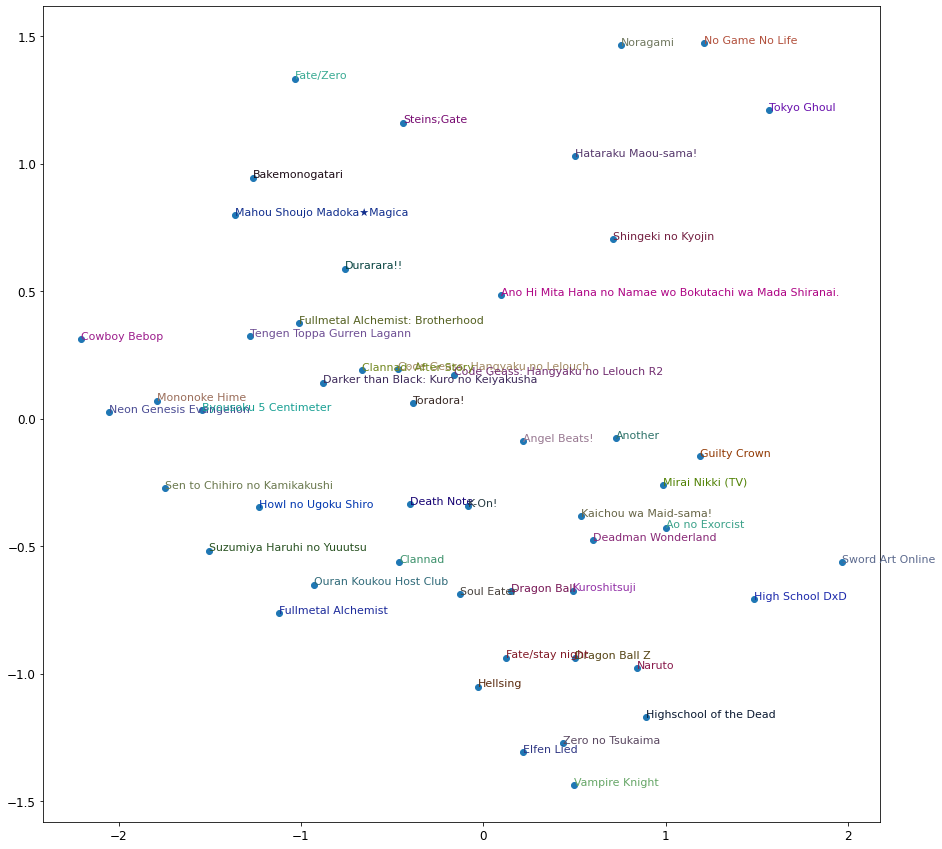

In [ ]:
#@title Embedding space of a subset of 100 movies.
idxs = np.random.choice(len(top_animes), 100, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_animes[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [ ]:
anime01 = 'Toradora!'

In [ ]:
#@title Top 5 most similar movies of target anime01.
movie_factors = learn.model.i_weight.weight
idx = dls.classes['name'].o2i[anime01]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['name'][idx]

(#5) ['Clannad: After Story','Angel Beats!','Clannad','K-On!','Kimi ni Todoke']

In [ ]:
anime02 = 'Clannad: After Story'

In [ ]:
#@title Top 5 most similar movies of target anime02.
movie_factors = learn.model.i_weight.weight
idx = dls.classes['name'].o2i[anime02]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['name'][idx]

(#5) ['Toradora!','Darker than Black: Kuro no Keiyakusha','Code Geass: Hangyaku no Lelouch','Fullmetal Alchemist: Brotherhood','Clannad']

In [ ]:
anime03 = 'Clannad'

In [ ]:
#@title Top 5 most similar movies of target anime03.
movie_factors = learn.model.i_weight.weight
idx = dls.classes['name'].o2i[anime03]
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1:6]
dls.classes['name'][idx]

(#5) ['Toradora!','Clannad: After Story','K-On!','Angel Beats!','Code Geass: Hangyaku no Lelouch R2']